In [3]:
import pandas as pd
import re

# Comparativa de modelos

In [4]:
path = '/home/mr1142/Documents/Data/models/mascaras/validation_results/validation_results' + '' + '.csv'
df = pd.read_csv(path)

In [5]:
df['doble_loss'] = df['dice_coef_loss'] + df['loss_mask']

In [6]:
df.reset_index(drop = True)
index = [i for i in df.index if bool(re.search('paper', df['name'][i]))]

In [7]:
df['patologic'] = [1 if bool(re.search('patologic', df['name'][i])) else 0 for i in df.index]

In [8]:
df = df.iloc[index]

In [9]:
df.insert(3, 'dice', 1-df.dice_coef_loss)

In [11]:
df.sort_values('dice_coef_loss')

,type,name,loss,dice,dice_coef_loss,loss_mask,accuracy,AUC,false_positives,false_negatives,doble_loss,patologic
112,unet,patologic_paper_8,0.027146,0.972854,0.027146,0.082252,0.978494,0.978850,140386.0,141495.0,0.109399,1
110,uloss,patologic_paper_10,0.108737,0.971563,0.028437,0.080300,0.977669,0.977994,100301.0,192395.0,0.108737,1
74,unet,patologic_paper_1,0.030031,0.969969,0.030031,0.116783,0.976254,0.976243,145346.0,165903.0,0.146814,1
94,uloss,patologic_paper_6,0.112887,0.969903,0.030097,0.082790,0.976313,0.978237,141024.0,169441.0,0.112887,1
80,unet,patologic_paper_2,0.030269,0.969731,0.030269,0.085681,0.976220,0.974785,109029.0,202658.0,0.115950,1
102,unet,patologic_paper_6,0.030441,0.969559,0.030441,0.083429,0.976164,0.974897,104539.0,207885.0,0.113870,1
86,uloss,patologic_paper_4,0.113256,0.969488,0.030512,0.082743,0.976104,0.976162,99009.0,214205.0,0.113256,1
98,unet,patologic_paper_5,0.030564,0.969436,0.030564,0.087874,0.975898,0.975676,138553.0,177354.0,0.118438,1
84,unet,patologic_paper_3,0.031117,0.968883,0.031117,0.086835,0.975639,0.973503,104962.0,214347.0,0.117953,1
76,uloss,patologic_paper_1,0.118451,0.968514,0.031486,0.086965,0.975364,0.976667,112032.0,210880.0,0.118451,1


In [577]:
df_normal = df[df.patologic == 0]
df_pato = df[df.patologic == 1]

In [578]:
df.columns

Index(['type', 'name', 'loss', 'dice', 'dice_coef_loss', 'loss_mask',
       'accuracy', 'AUC', 'false_positives', 'false_negatives', 'doble_loss',
       'patologic'],
      dtype='object')

# Results

## PLOT

In [579]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [580]:
df.columns

Index(['type', 'name', 'loss', 'dice', 'dice_coef_loss', 'loss_mask',
       'accuracy', 'AUC', 'false_positives', 'false_negatives', 'doble_loss',
       'patologic'],
      dtype='object')

In [621]:
y = 'AUC'
data = df
low_lim = np.percentile(data[y], 0)
high_lim = np.percentile(data[y], 75)
ir =  high_lim - low_lim

[(0.63, 1.0)]

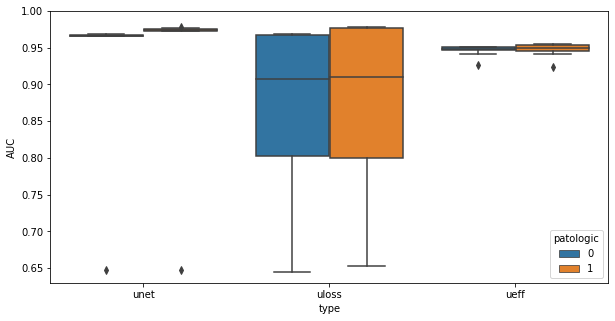

In [623]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="type", y=y, hue='patologic',
                data=data)
p.set(ylim=(0.63, 1))

In [624]:
p.figure.savefig('paper_results/' + y + '.png')